In [9]:
#Description: This program predicts if a passanger will survive on the titanic

In [38]:
#import libraries

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [39]:
#load the datasets
t_train=pd.read_csv('datasets/titanic/train.csv')
t_test=pd.read_csv('datasets/titanic/test.csv')
t_test1=pd.read_csv('datasets/titanic/test.csv')

# EDA(Exploratory Data Analysis)

In [3]:
#count the no. of rows and columns in the data set
t_train.shape

(891, 12)

In [4]:
#load first 10 rows of data
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#get some statistics(only for numerical data)
t_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#get the count of the number of survivers
t_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

342 of 891 passengers survived and it is the 38.38% of the training set.
549 of 891 passengers didnt survive and it is the 61.62% of the training set.


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


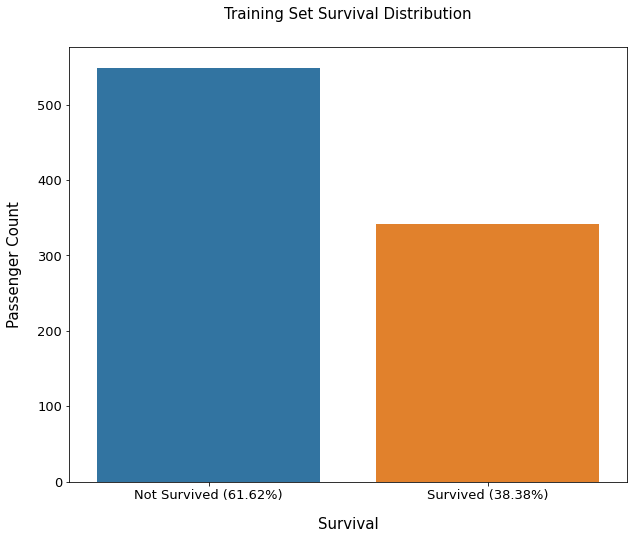

In [7]:
survived = t_train['Survived'].value_counts()[1]
not_survived =t_train['Survived'].value_counts()[0]
survived_per = survived / t_train.shape[0] * 100
not_survived_per = not_survived / t_train.shape[0] * 100

print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, t_train.shape[0], survived_per))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the training set.'.format(not_survived, t_train.shape[0], not_survived_per))

plt.figure(figsize=(10, 8))
sns.countplot(t_train['Survived'])

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)
plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.title('Training Set Survival Distribution', size=15, y=1.05)
plt.show()

# Target Distribution in Features
Both of the continuous features (Age and Fare) have good split points and spikes for a decision tree to learn. One potential problem for both features is, the distribution has more spikes and bumps in training set, but it is smoother in test set. Model may not be able to generalize to test set because of this reason.

Distribution of Age feature clearly shows that children younger than 15 has a higher survival rate than any of the other age groups
In distribution of Fare feature, the survival rate is higher on distribution tails. The distribution also has positive skew because of the extremely large outliers

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

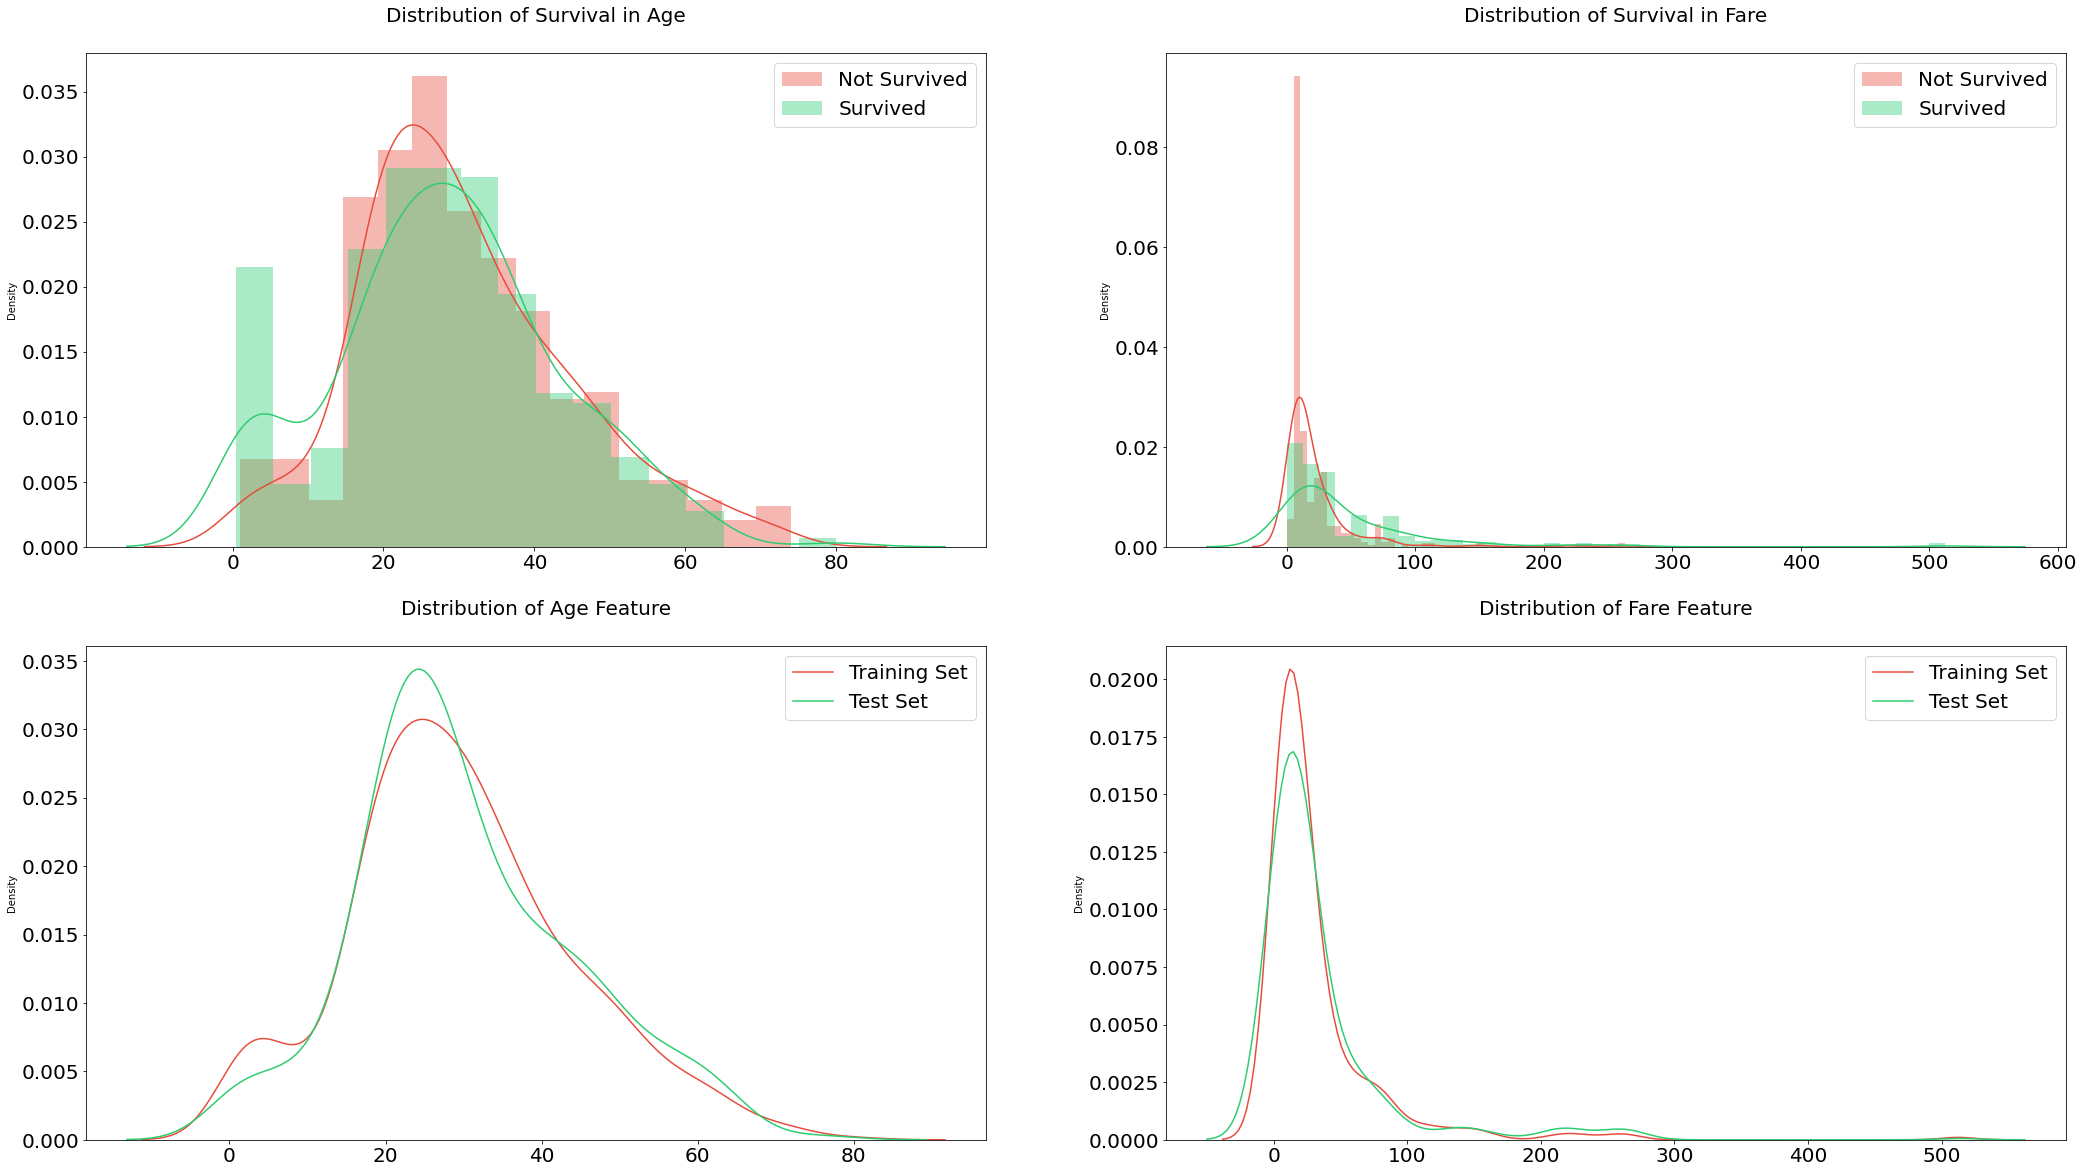

In [8]:
cont_features = ['Age', 'Fare']
surv = t_train['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.distplot(t_train[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i])
    sns.distplot(t_train[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(t_train[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(t_test[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

IndexError: list index out of range

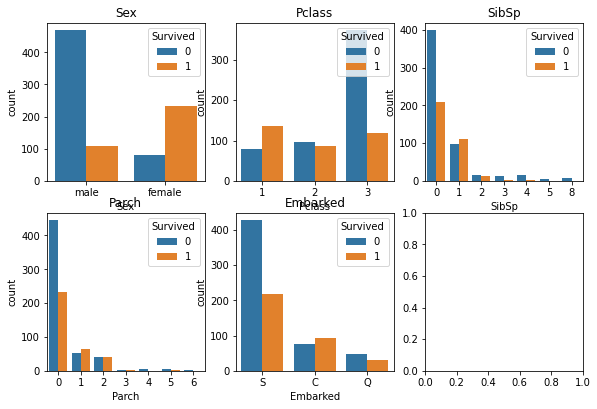

In [9]:
#Visualizer the count of survivors for columns 'Sex','Pclass','SibSp','Parch','Embarked'
cols=['Sex','Pclass','SibSp','Parch','Embarked']
nor=2
noc=3
#The subplot grid and figure size of each graph
fig,axs=plt.subplots(nor,noc,figsize=(noc*3.2,nor*3.2))
for r in range(nor):
    for c in range(noc):
        i=r*noc + c#index to through the number of columns
        ax=axs[r][c] #show where to position each sub plot
        sns.countplot(t_train[cols[i]],hue=t_train['Survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived',loc='upper right')
plt.tight_layout()

In [ ]:
#Look as survial rate by sex and survived
t_train.groupby('Sex')[['Survived']].mean()

In [ ]:
#Look at survival rate by sex and class
t_train.pivot_table('Survived',index='Sex',columns='Pclass')

In [ ]:
#Look at survival rate by sex and class visually
t_train.pivot_table('Survived',index='Sex',columns='Pclass').plot()
plt.show()

In [10]:
#Survival rate by sex,age and class
age=pd.cut(t_train['Age'],[0,18,80])
t_train.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

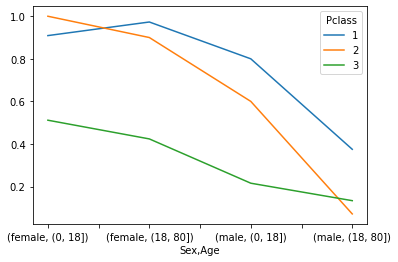

In [11]:
#Survival rate by sex,age and class visual
t_train.pivot_table('Survived',['Sex',age],'Pclass').plot()
plt.show()

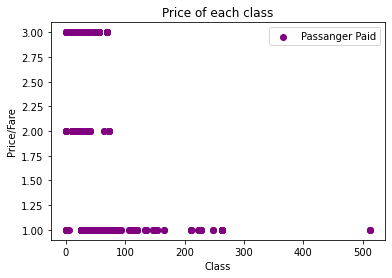

In [12]:
#Plot the prices paid of each class
plt.scatter(t_train['Fare'],t_train['Pclass'],color='purple',label='Passanger Paid')
plt.xlabel('Class')
plt.ylabel('Price/Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

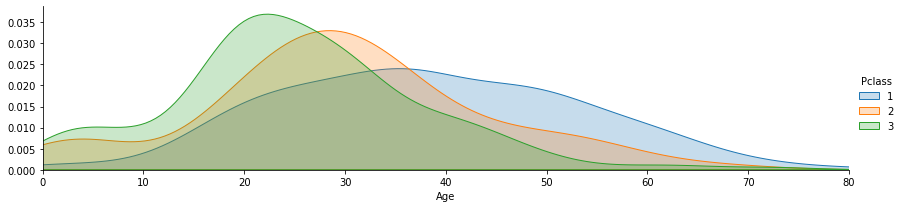

In [13]:
# the age distribution varies for different classes
fig = sns.FacetGrid(t_train,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = t_train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

Quite clearly, we can see that the first class passengers belonged more to the middle age groups, with very few children.

Second and third class had more children, with relatively fewer older people.

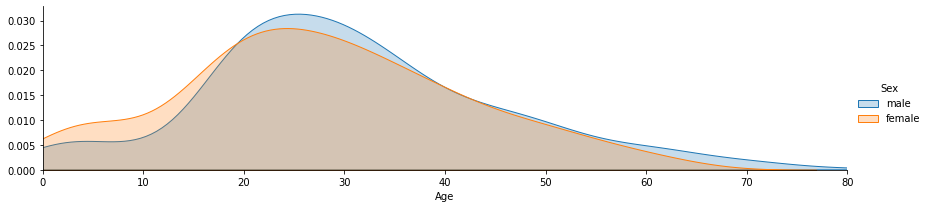

In [14]:
fig = sns.FacetGrid(t_train,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=t_train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

The age distribution seems to be less varied in terms of male and female passengers, though we can say that there more younger females than younger males.

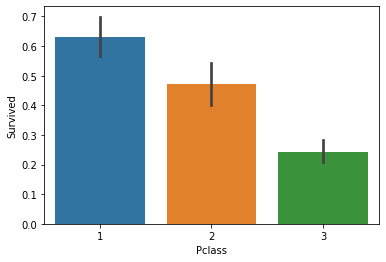

In [15]:
sns.barplot(x='Pclass',y='Survived',data=t_train)
plt.show()

# Where did the passengers come from?
The Embarked attribute contains data for the passengers' port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


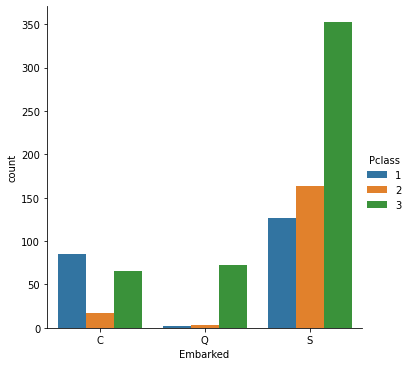

In [16]:
sns.factorplot('Embarked',data=t_train,kind='count',hue='Pclass',order=['C','Q','S'])
plt.show()

In [17]:
#Count the empty value in each column
t_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
#Look at the values in each column and get count
for val in t_train:
    print(t_train[val].value_counts())
    print()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Goodwin, Mr. Charles Edward                  1
Andersson, Miss. Erna Alexandra              1
Moran, Miss. Bertha                          1
Masselmani, Mrs. Fatima                      1
Compton, Miss. Sara Rebecca                  1
                                            ..
Ali, Mr. Ahmed                               1
Brown, Mrs. James Joseph (Margaret Tobin)    1
Millet, Mr. Francis Davis                    1
Henry, Miss. Delia                           1
McCoy, Miss. Agnes                           1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, 

In [19]:
#removing missing values
t_train=t_train.dropna(subset=['Embarked','Age'])

In [20]:
#Drop columns
t_train=t_train.drop(['Ticket','PassengerId','Cabin','Name'],axis=1)

In [21]:
#Counting rows and columns of new dataset
t_train.shape

(712, 8)

In [22]:
#Look at the data types
t_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [23]:
#Printing the unique values in the columns of age and embarked
print(t_train['Sex'].unique())
print(t_train['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.


# Feature Transformation
Label Encoding Non-Numerical Features

In [24]:
#via using sklearn.preprocessing lib. 
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

#Encoding the Sex column
t_train.iloc[:,2]=labelencoder.fit_transform(t_train.iloc[:,2].values)

#Encoding the Embarked column
t_train.iloc[:,7]=labelencoder.fit_transform(t_train.iloc[:,7].values)

In [25]:
#Printing the unique values in the columns of age and embarked
print(t_train['Sex'].unique())
print(t_train['Embarked'].unique())

[1 0]
[2 0 1]


In [26]:
#All data is in numerical
t_train.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

# Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

In [27]:
#Split the data into independent 'X' and dependent  'Y' variables
X=t_train.iloc[:,1:8].values #traing data
Y=t_train.iloc[:,0].values #prediction data

In [28]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [29]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [82]:
#Function with many machine learning models
def models(xtrain,xtest):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(xtrain,ytrain)
    
    #Use Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(xtrain,ytrain)
    
    #Use SVC(Linear kernel)
    from sklearn.svm  import SVC
    svc_linear=SVC(kernel='linear',random_state=0)
    svc_linear.fit(xtrain,ytrain)
    
    #Use SVC(RBF kernel)
    from sklearn.svm  import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(xtrain,ytrain)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(xtrain,ytrain)
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(xtrain,ytrain)
    
    #Use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(xtrain,ytrain)
    
    #Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy',log.score(xtrain,ytrain))
    print('[1]K Neighbours Training Accuracy',knn.score(xtrain,ytrain))
    print('[2]SVC Linear Training Accuracy',svc_linear.score(xtrain,ytrain))
    print('[3]SVC RBF Training Accuracy',svc_rbf.score(xtrain,ytrain))
    print('[4]Gaussian Training Accuracy',gauss.score(xtrain,ytrain))
    print('[5]Decision Tree Training Accuracy',tree.score(xtrain,ytrain))
    print('[6]Random Forest Training Accuracy',forest.score(xtrain,ytrain))

    return log,knn,svc_linear,svc_rbf,gauss,tree,forest

In [83]:
#Get and train all of the models
model=models(xtrain,ytrain)

[0]Logistic Regression Training Accuracy 0.7978910369068541
[1]K Neighbours Training Accuracy 0.8664323374340949
[2]SVC Linear Training Accuracy 0.7768014059753954
[3]SVC RBF Training Accuracy 0.8506151142355008
[4]Gaussian Training Accuracy 0.8031634446397188
[5]Decision Tree Training Accuracy 0.9929701230228472
[6]Random Forest Training Accuracy 0.9753954305799648


In [84]:
#Show the confusion matrix and accuracy for all the models on the data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm=confusion_matrix(ytest,model[i].predict(xtest))
    
    #Extract TN,FP,FN,TP
    TN,FP,FN,TP=confusion_matrix(ytest,model[i].predict(xtest)).ravel()
    test_score=(TP+TN)/(TP+TN+FN+FP)
    print(cm)
    print('Model[{}] Testing Accuracy="{}"'.format(i,test_score))
    print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy="0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy="0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy="0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy="0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy="0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy="0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy="0.8391608391608392"



Best accuracy was of RandomForest so we choose to build and submit our model based on that

In [40]:
from sklearn.ensemble import RandomForestClassifier

y = t_train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(t_train[features])
X_test = pd.get_dummies(t_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

#output = pd.DataFrame({'PassengerId': t_test.PassengerId, 'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

In [93]:
#Use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=11,criterion='entropy',random_state=0)
forest.fit(xtrain,ytrain)

from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,xtrain,ytrain,cv=2,scoring='accuracy')
print("Score: ",score)
print("Mean: ",score.mean())
print("Standard Deviation:",score.std())

from sklearn.metrics import confusion_matrix


cm=confusion_matrix(ytest,forest.predict(xtest))
    
#Extract TN,FP,FN,TP
TN,FP,FN,TP=confusion_matrix(ytest,forest.predict(xtest)).ravel()
test_score=(TP+TN)/(TP+TN+FN+FP)
print(cm)
print('Model Testing Accuracy="{}"'.format(test_score))
print()

Score:  [0.81754386 0.8028169 ]
Mean:  0.8101803805287868
Standard Deviation: 0.007363479120336025
[[72 10]
 [14 47]]
Model Testing Accuracy="0.8321678321678322"



In [78]:

rf=RandomForestClassifier(n_estimators=10,random_state=2)
score=cross_val_score(rf,xtrain,ytrain,cv=2,scoring='accuracy')


Score:  [0.81754386 0.8028169 ]
Mean:  0.8101803805287868
Standard Deviation: 0.007363479120336025


In [90]:
print(score)

[0.81754386 0.8028169 ]


# References

Books

Ries, E., 2011. The Lean Startup: How Today's Entrepreneurs Use Continuous Innovation to Create Radically Successful Businesses
Hair, J.F., Black, W.C., Babin, B.J., Anderson, R.E. and Tatham, R.L., 2013. Multivariate data analysis
Asefeso, A., Lund, S.B., Parry, H., 2014. Keep Your Eyes On the Horizon: Business Lessons from Unsinkable Titanic

Note Books

Some Kaggle note books

Videos

Rogati, M., 2012. The Model and the Train Wreck: A Training Data How-To. O'Reilly Strata.
Kleon, A., 2012. Steal like an artist. TEDx Talks.